# Using Neural net to predic multiple output

In [51]:
# Loading libraries

library(neuralnet)
library(caTools)
set.seed(100)

In [52]:
an <- read.csv("new_an.csv")
an <- subset(an, select = -c(X, cof))
summary(an)

     design        epsilon              sh                 w           
 Min.   : 1.0   Min.   :2.33000   Min.   :1.000000   Min.   :32.15000  
 1st Qu.:25.5   1st Qu.:3.00000   1st Qu.:1.240000   1st Qu.:37.12550  
 Median :50.0   Median :3.00000   Median :1.500000   Median :38.22400  
 Mean   :50.0   Mean   :3.58404   Mean   :1.502155   Mean   :40.03531  
 3rd Qu.:74.5   3rd Qu.:4.60000   3rd Qu.:1.779500   3rd Qu.:43.89400  
 Max.   :99.0   Max.   :4.60000   Max.   :2.000000   Max.   :46.19400  
       l                 fpl                fpw                oof          
 Min.   :27.68000   Min.   : 9.22670   Min.   :16.07500   Min.   :2253.000  
 1st Qu.:29.25200   1st Qu.: 9.74150   1st Qu.:18.56275   1st Qu.:2318.500  
 Median :34.39900   Median :11.46633   Median :19.11200   Median :2362.000  
 Mean   :33.66324   Mean   :13.07926   Mean   :20.01765   Mean   :2371.172  
 3rd Qu.:36.89900   3rd Qu.:12.29967   3rd Qu.:21.94700   3rd Qu.:2414.500  
 Max.   :43.00000   Max.   :28.660

In [53]:
# Train and test set for cross-check
sample <- sample.split(scaled$design, SplitRatio = 0.80)
train0 <- subset(an, sample == T)
test0 <- subset(an, sample == F)
dim(train0)
dim(test0)

[1] 79 13

[1] 20 13

In [54]:
# Scaling of data for Neural net

max <- apply(an, 2, max)
min <- apply(an, 2, min)
scaled <- as.data.frame(scale(an, center = min, scale = max - min))

In [55]:
# Preparing training and testing set

train <- subset(scaled, sample == T)
test <- subset(scaled, sample == F)
dim(train)
dim(test)

[1] 79 13

[1] 20 13

In [56]:
nn <- neuralnet(s11 + efficency ~ epsilon + sh+ w + l , data = train, hidden = 2, linear.output = T)

In [57]:
#Predict using Neural Net
predict_nn = compute(nn, test[,c(2:5)])

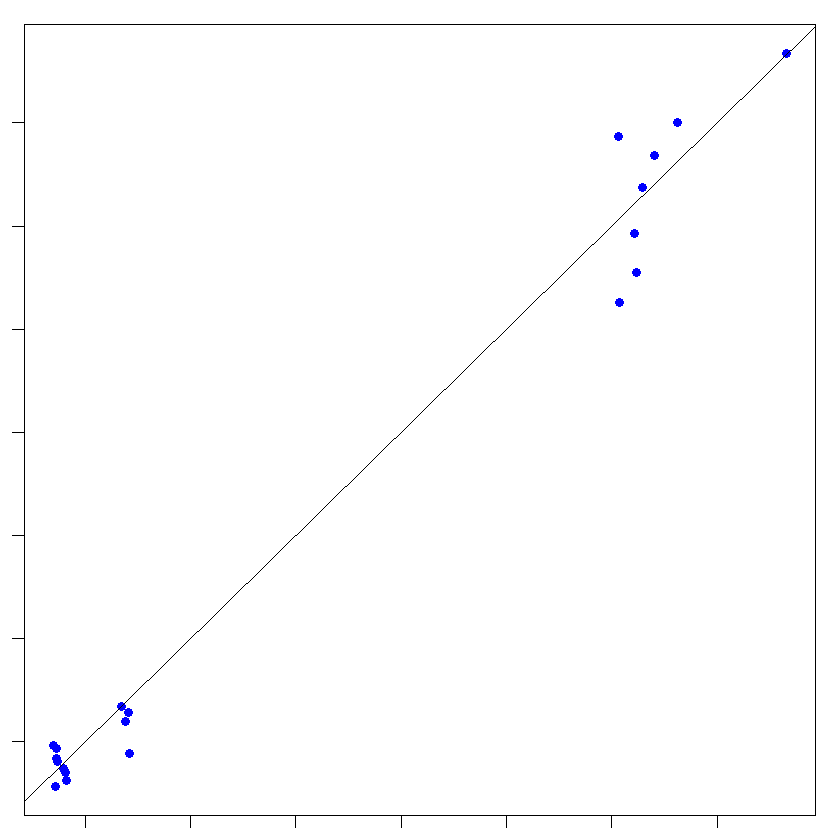

In [58]:
# Unscaling s11 values
s11 = (predict_nn$net.result[,1] * (max(an$s11) - min(an$s11))) + min(an$s11)

par(mar=c(1,1,1,1))
plot(test0$s11, s11, col='blue', pch=16, ylab = "predicted rating NN", xlab = "real rating")

abline(0,1)

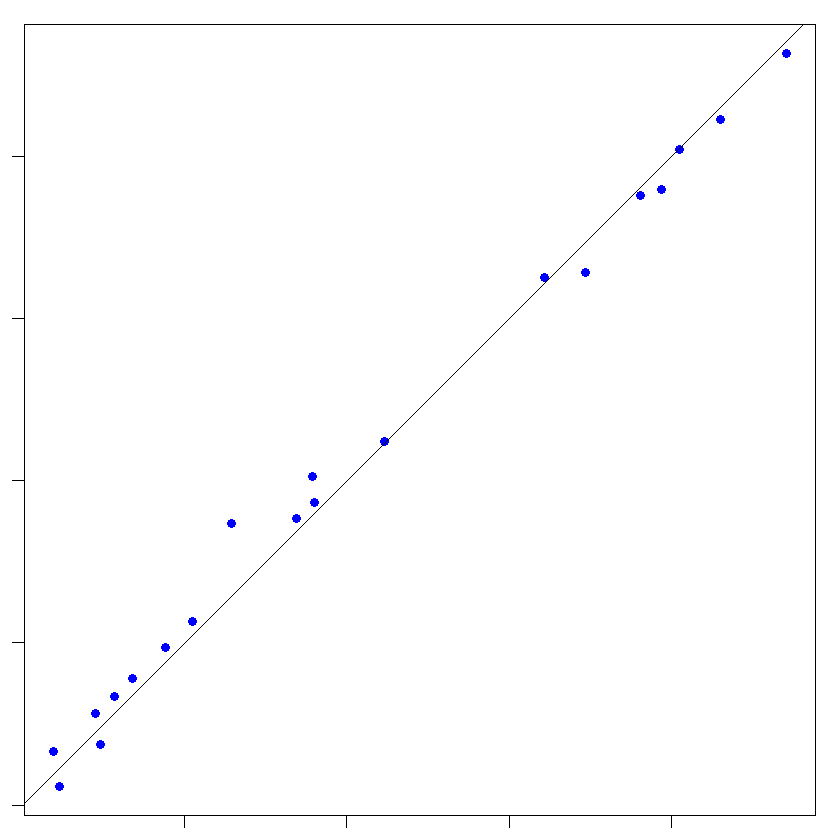

In [59]:
# Unscaling efficency value

efficency = (predict_nn$net.result[,2] * (max(an$efficency) - min(an$efficency))) + min(an$efficency)

par(mar=c(1,1,1,1))
plot(test0$efficency, efficency, col='blue', pch=16, ylab = "predicted rating NN", xlab = "real rating")

abline(0,1)

In [60]:
# Calculate Root Mean Square Error for s11
rmse_s11 = (sum((test0$s11 - s11)^2) / nrow(test0)) ^ 0.5

rmse_efficency = (sum((test0$efficency - efficency)^2) / nrow(test0)) ^ 0.5
rmse_s11
rmse_efficency

[1] 1.81189675

[1] 1.463394874

In [63]:
#Result Comparison
# First col is original data and Second col is predicted data

data.frame(test0$efficency, efficency)

,test0.efficency,efficency
7,32.3,31.13144387
12,34.8,33.71472374
28,31.9,33.30264688
32,34.5,35.65800867
34,35.7,36.71540407
36,36.8,37.78214545
39,38.8,39.69581762
42,40.5,41.34776447
43,77.1,76.38302546
44,70.5,70.47774845


In [64]:
#Result Comparison
# First col is original data and Second col is predicted data

data.frame(test0$s11, s11)

,test0.s11,s11
7,30.335,34.326100090
12,30.375,26.316022773
28,38.298,38.370294591
32,33.134,35.029240167
34,32.047,33.414787888
36,31.449,31.887819315
39,31.083,29.617846885
42,31.174,27.731095650
43,6.927,5.998597826
44,7.046,6.415354782
